In [ ]:
import pandas as pd

FrequencyData  = pd.read_csv("Frequency.csv")
FrequencyData

,Word,Difficulty,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 plus
0,manly,18,0,2,17,37,29,12,2
1,molar,21,0,4,21,38,26,9,1
2,havoc,33,0,2,16,38,30,12,2
3,impel,31,0,3,21,40,25,9,1
4,condo,32,0,2,17,35,29,14,3
...,...,...,...,...,...,...,...,...,...
354,drink,26,1,9,35,34,16,5,1
355,query,26,1,4,16,30,30,17,2
356,gorge,35,1,3,13,27,30,22,4
357,crank,23,1,5,23,31,24,14,2


In [ ]:
FrequencyData.describe(include="all")

,Word,Difficulty,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 plus
count,359,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
unique,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,manly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.256267,0.470752,5.844011,22.727019,32.927577,23.637883,11.559889,2.805014
std,NaN,7.482274,0.782923,4.076525,7.781092,5.353983,5.946908,6.207416,4.121869
min,NaN,14.000000,0.000000,0.000000,4.000000,11.000000,9.000000,2.000000,0.000000
25%,NaN,23.000000,0.000000,3.000000,17.000000,30.000000,19.000000,7.000000,1.000000
50%,NaN,26.000000,0.000000,5.000000,23.000000,34.000000,24.000000,10.000000,2.000000
75%,NaN,32.000000,1.000000,7.000000,29.000000,36.000000,28.000000,15.000000,3.000000


In [ ]:
FrequencyData["Difficulty"].value_counts()

Difficulty
26    33
23    26
25    25
24    22
27    21
20    19
22    19
21    18
28    17
29    17
31    13
30    12
35    11
32    10
19    10
37     9
34     9
33     7
36     7
38     7
44     5
39     5
40     4
18     4
46     3
41     3
17     3
42     3
50     2
48     2
49     2
15     2
43     2
45     2
14     2
53     1
56     1
55     1
Name: count, dtype: int64

In [ ]:
FrequencyData
print(FrequencyData.columns)


Index(['Word', 'Difficulty', '1 try', '2 tries', '3 tries', '4 tries',
       '5 tries', '6 tries', '7 plus'],
      dtype='object')


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Frequency.csv')

X = FrequencyData[['Difficulty']]  # Features (difficulty score)
y = FrequencyData[['1 try', '2 tries',
       '3 tries', '4 tries', '5 tries', '6 tries', '7 plus']]  # Target variables

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a decision tree regressor model
base_model = DecisionTreeRegressor()
model = MultiOutputRegressor(base_model)

model = DecisionTreeRegressor()
model.fit(X_train.values, y_train)
# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


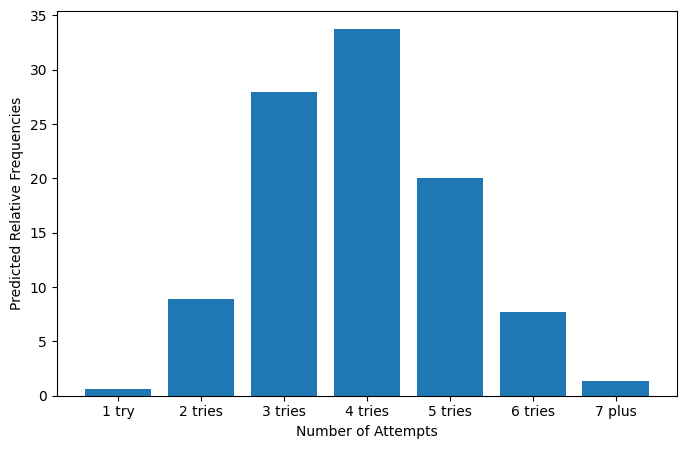

In [ ]:
import matplotlib.pyplot as plt

# Example of predicting relative frequencies for a new difficulty score
new_difficulty_score = [[26]]  # Insert Difficult Score (Min 5) (Max 18)
predicted_relative_frequencies = model.predict(new_difficulty_score)


# Creates relative frequncy plot of predicted values
plt.figure(figsize=(8, 5))
plt.bar(range(len(predicted_relative_frequencies[0])), predicted_relative_frequencies[0])
plt.xlabel('Number of Attempts')
plt.ylabel('Predicted Relative Frequencies')
plt.xticks(range(len(predicted_relative_frequencies[0])), ['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 plus'])
plt.show()

In [ ]:
import numpy as np
difficulty_scores = np.arange(14, 57).reshape(-1, 1)  # Reshape to 2D array for model input

# Predict the relative frequencies for each difficulty score
predicted_relative_frequenciesList = [model.predict([[score]]) for score in range(14, 57)]

# Define the number of attempts (1 to 7)
num_attempts = np.arange(1, 8)

mean_attempts_list = []

# Calculate mean number of attempts for each index
for freq in predicted_relative_frequenciesList:
    mean_attempts = np.sum(freq * num_attempts) / np.sum(freq)
    mean_attempts_list.append(mean_attempts)



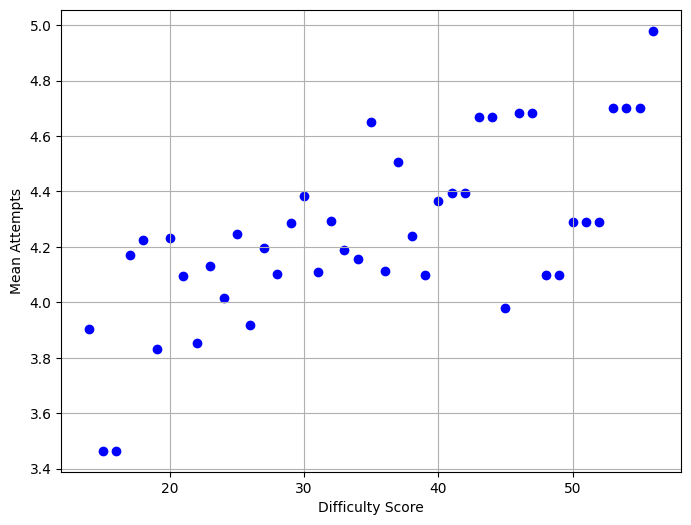

In [ ]:
  import numpy as np
  import matplotlib.pyplot as plt

  difficulty_scores_arr = np.array(difficulty_scores)
  mean_attempts_arr = np.array(mean_attempts_list)

  # Plot scatterplot
  plt.figure(figsize=(8, 6))
  plt.scatter(difficulty_scores_arr, mean_attempts_arr, color='blue')
  plt.xlabel('Difficulty Score')
  plt.ylabel('Mean Attempts')
  plt.grid(True)
  plt.show()